## Watershed workbook

Watershed workbook that can be used to inspect each step and experiment with parameters such as spot and distance sigma

At least my hands, watershed based based methods were not successful on the egg image.  Probably because the peaks are off center because of noise. 

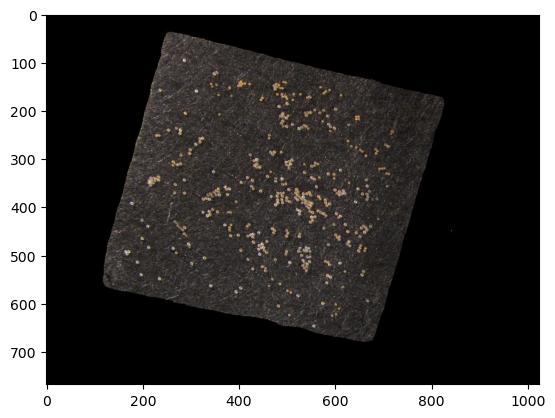

In [14]:
from skimage.io import imread
import os
import os
from skimage.filters import gaussian
from skimage.color import rgb2hsv
from skimage.filters import threshold_otsu  
import numpy as np
from skimage.measure import label
# import random lable colormap
from tnia.plotting.plt_helper import random_label_cmap# import peak_local_max
from skimage.feature import peak_local_max
from scipy import ndimage as ndi
from skimage.segmentation import watershed
import matplotlib.pyplot as plt
import napari

tnia_images_path = r"D:\images\tnia-python-images"

im_rgb = imread(os.path.join(tnia_images_path, r"imagesc\2024_01_10_insect_egg_count\I1_F1_O20_SWI_R1_13-09-23.tif"))
            
plt.imshow(im_rgb)

In [15]:

im = rgb2hsv(im_rgb)[:,:,2]
thresholded = im>threshold_otsu(im[im>0])

# remove small objects
from skimage.morphology import remove_small_objects
thresholded = remove_small_objects(thresholded, min_size=20)


im = thresholded*im
spot_sigma = 2
distance_sigma = 2
min_distance = 2

#intensity_to_use = im_v_blur*thresholded
blurred_spot = gaussian(im, spot_sigma)

# calculate peaks from blurred image
coords = peak_local_max(blurred_spot, min_distance)
print(coords.shape)
mask = np.zeros(im.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)

# calculate distance map from second blurred image
blurred_distance = gaussian(im, distance_sigma)
binary_distance = blurred_distance>threshold_otsu(blurred_distance)

distance = ndi.distance_transform_edt(binary_distance)

viewer=napari.Viewer()
viewer.add_image(im, name='im')
viewer.add_image(thresholded, name = 'bad thresholded?')
viewer.add_image(blurred_spot, name='blurred_spot')
viewer.add_points(coords, face_color=[0,0,0,0], edge_color='red', size=1)
#viewer.add_image(blurred_distance, name='blurred_distance')
#viewer.add_image(binary_distance, name='binary_distance')
viewer.add_image(distance, name='distance')

labels = watershed(-distance, markers, mask=thresholded,watershed_line=True)

viewer.add_labels(labels, name='labels')

(287, 2)


<Labels layer 'labels' at 0x134f8849f40>